In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [11]:
df = pd.read_csv(r'D:\Mission - 1\Project\AI\Resume_Building\jobs_dataset_with_features.csv')

In [12]:
df.head()

,Role,Features
0,Social Media Manager,5 to 15 Years Digital Marketing Specialist M.T...
1,Frontend Web Developer,"2 to 12 Years Web Developer BCA HTML, CSS, Jav..."
2,Quality Control Manager,0 to 12 Years Operations Manager PhD Quality c...
3,Wireless Network Engineer,4 to 11 Years Network Engineer PhD Wireless ne...
4,Conference Manager,1 to 12 Years Event Manager MBA Event planning...


In [13]:
df.shape

(1615940, 2)

In [14]:
df['Role'].value_counts()

Role
Interaction Designer            20580
Network Administrator           17470
User Interface Designer         14036
Social Media Manager            13945
User Experience Designer        13935
                                ...  
Inventory Control Specialist     3342
Budget Analyst                   3335
Clinical Nurse Manager           3324
Social Science Researcher        3321
Paid Advertising Specialist      3306
Name: count, Length: 376, dtype: int64

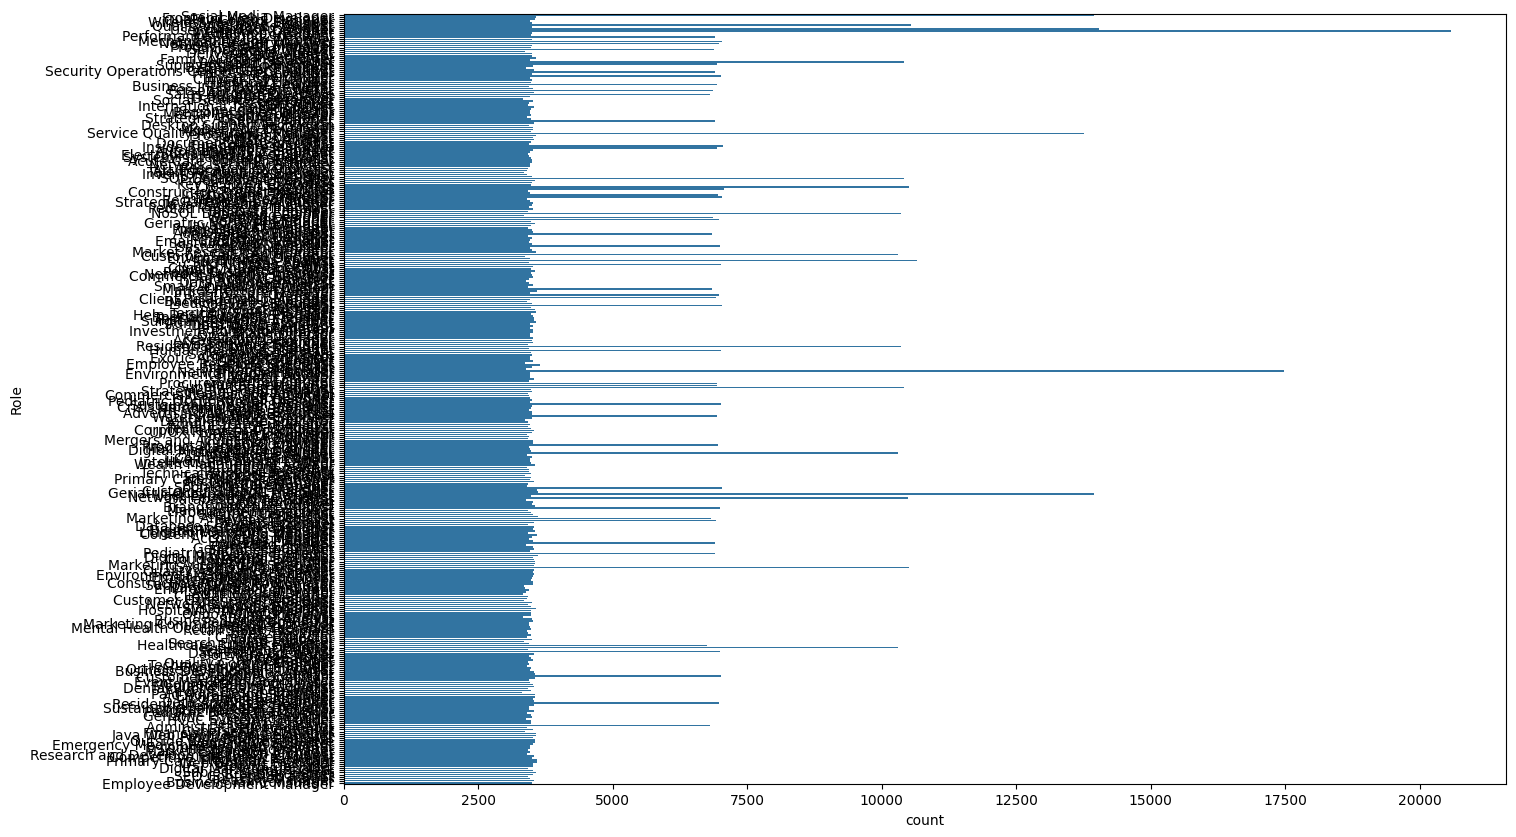

In [15]:
plt.figure(figsize=(15,10))
sns.countplot(df['Role'])
plt.show()

In [18]:
min_count=6500
role_counts=df['Role'].value_counts()
dropped_classes = role_counts[role_counts < min_count].index
filtered_df = df[~df['Role'].isin(dropped_classes)].reset_index(drop=True)

filtered_df['Role'].value_counts()

Role
Interaction Designer          20580
Network Administrator         17470
User Interface Designer       14036
Social Media Manager          13945
User Experience Designer      13935
                              ...  
Benefits Coordinator           6839
Research Analyst               6830
Administrative Coordinator     6803
IT Support Specialist          6799
UI/UX Designer                 6743
Name: count, Length: 61, dtype: int64

In [20]:
len(filtered_df['Role'].value_counts())

61

In [21]:
df= filtered_df.sample(n=10000)

In [22]:
df.head()

,Role,Features
237384,Data Analyst,3 to 13 Years Marketing Analyst MCA Data analy...
283118,Residential Landscape Designer,0 to 9 Years Landscape Architect M.Tech Landsc...
349227,UI/UX Designer,4 to 11 Years Graphic Designer MBA User interf...
499416,Data Analyst,2 to 14 Years Marketing Analyst BBA Data analy...
51791,Customer Support Specialist,1 to 15 Years Customer Success Manager M.Com C...


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X=df['Features']
y= df['Role']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf= tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [24]:
# RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tfidf,y_train)

#Predictions
y_pred = rf_classifier.predict(X_test_tfidf)

#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("accuracy: ", accuracy)

accuracy:  1.0


##### Recommendation

In [26]:
# Clean resume
import re

def cleanResume(resume_text):
    cleantext = re.sub('http\\S+\\s*', ' ', resume_text)  # remove URLs
    cleantext = re.sub('RT|cc', ' ', resume_text)  # remove RT and cc
    cleantext = re.sub('#\\S+', '', resume_text)  # remove hashtags
    cleantext = re.sub('@\\S+', '  ', resume_text)  # remove mentions
    cleantext = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~"""), ' ', resume_text)  # remove punctuations
    cleantext = re.sub(r'[^\x00-\x7f]',r' ', resume_text)  # remove non-ASCII characters
    cleantext = re.sub('\s+', ' ', resume_text)  # remove extra whitespace
    return cleantext


def job_recommendation(resume_text):
    resume_text = cleanResume(resume_text)
    resume_tfidf = tfidf_vectorizer.transform([resume_text])
    predicted_category = rf_classifier.predict(resume_tfidf)[0]
    return predicted_category

<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Naman Sharan Yadav\AppData\Local\Temp\ipykernel_19416\1288222916.py:11: SyntaxWarning: invalid escape sequence '\s'
  cleantext = re.sub('\s+', ' ', resume_text)  # remove extra whitespace


In [27]:
resume_file = """\
=========================
        RESUME
=========================

Name: [Your Name]
Email: [your.email@example.com]
Phone: +91-XXXXXXXXXX
LinkedIn: linkedin.com/in/yourprofile
GitHub: github.com/yourusername

-------------------------
Career Objective
-------------------------
To secure a challenging position in a reputable organization where I can utilize my skills,
expand my knowledge, and contribute to organizational growth.

-------------------------
Education
-------------------------
Bachelor of Computer Applications (BCA)
[Your College Name], [Your University]
Year: [Start Year] - [End Year]

-------------------------
Skills
-------------------------
- Programming Languages: Python, C, Java
- Web Technologies: HTML, CSS, JavaScript, Django
- Databases: MySQL, SQLite
- Tools: Git, VS Code, Jupyter Notebook

-------------------------
Projects
-------------------------
1. AI-powered Government Scheme Chatbot
   - Built using Python, Machine Learning, LangChain, and RAG
   - Provides students and parents with financial aid and scheme information

2. Crop Yield & Weather Impact Prediction System
   - Developed with Python, ML models, and data visualization
   - Helps in agriculture and disaster management planning

-------------------------
Experience / Internships
-------------------------
[Company/Organization Name] – [Role]
[Start Date] – [End Date]
- Describe your responsibilities and achievements here

-------------------------
Achievements
-------------------------
- Selected among 3000 students for IBM AI-powered project jury
- Participated in The Fourfold Code Quest coding competition

-------------------------
Personal Details
-------------------------
Date of Birth: DD/MM/YYYY
Languages: English, Hindi
Location: [Your City, State]

-------------------------
Declaration
-------------------------
I hereby declare that the above information is true to the best of my knowledge.

[Your Name]
"""
predicted_category = job_recommendation(resume_file)
print("Predicted Category: ",predicted_category)

Predicted Category:  Backend Developer


In [29]:
import pickle
pickle.dump(rf_classifier,open(r"D:\Mission - 1\Project\AI\Resume_Building\models\rf_classifier_job_recommendation.pkl",'wb'))
pickle.dump(tfidf_vectorizer, open(r"D:\Mission - 1\Project\AI\Resume_Building\models\tfidf_vectorizer_job_recommendation.pkl",'wb'))